<h1 style="text-align: center;" markdown="1">TP2: Ensamble FINAL</h1>
![](../data/icon_properati-data.png)

Se entrenaran varios algoritmos y se iran combinando en este mismo notebook.

In [4]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Obtener y limpiar dataset

In [56]:
properties =knnlibrary.get_dataset()
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,3725ec6040dd4c59e6807752b23bc376fe927753,2016-07-01,sell,house,Esperanza,|Argentina|Santa Fe|Esperanza|,Argentina,Santa Fe,3856022.0,NaN,...,20.0,NaN,125000.000000,NaN,NaN,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,Corredor Responsable: Martin Eguiazu - CCI Mat...,Venta de casa de 3 dormitorios,https://thumbs4.properati.com/8/JiQiOmUpHQ06Co...
1,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,2016-07-01,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.592891,-58.408693",...,180.0,NaN,2111.111111,1.0,4.0,NaN,http://www.properati.com.ar/zo17_venta_departa...,Corredor Responsable: Uno Bienes Raices SRL - ...,Hermoso Piso en Edificio de Estilo.4amb con dep.,https://thumbs4.properati.com/4/bzYZriZno3lXfC...
2,17760ecd8751167a1ce2eed3d589d390874213cd,2016-07-01,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.1105196,-57.6208718",...,260.0,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,"En lo mejor de Rumenco , se encuentra esta cas...","Casa Rumenco , Los Sauces",https://thumbs4.properati.com/2/Ffvi9GU4qYv3lx...
3,8ac8b6411bffa318882cd2961c978cc931f35e93,2016-07-01,sell,house,Zárate,|Argentina|Buenos Aires Interior|Zárate|Zárate|,Argentina,Buenos Aires Interior,NaN,NaN,...,20.0,NaN,9750.000000,NaN,NaN,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,Corredor Responsable: Luis Alberto De Blas - C...,A demoler Lote para emprendimiento,https://thumbs4.properati.com/3/LxBdWMWXWHUxA8...
4,a1ad15fd9cbe67ddb0a7a735c5c4b27099871707,2016-07-01,sell,house,Zárate,|Argentina|Buenos Aires Interior|Zárate|Zárate|,Argentina,Buenos Aires Interior,NaN,NaN,...,166.0,NaN,813.253012,NaN,NaN,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,Corredor Responsable: Luis Alberto De Blas - C...,Casa una planta impecable.,https://thumbs4.properati.com/0/4ul13t9aSvCx4G...


In [57]:
# obtenemos las propiedades del ultimo año
properties_lastyear = properties[properties['created_on']>'2016-10-01']
properties_lastyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250606 entries, 14319 to 34862
Data columns (total 27 columns):
id                            250606 non-null object
created_on                    250606 non-null object
operation                     250606 non-null object
property_type                 250606 non-null object
place_name                    250543 non-null object
place_with_parent_names       250606 non-null object
country_name                  250606 non-null object
state_name                    250606 non-null object
geonames_id                   204714 non-null float64
lat-lon                       211982 non-null object
lat                           211982 non-null float64
lon                           211982 non-null float64
price                         217675 non-null float64
currency                      215814 non-null object
price_aprox_local_currency    217675 non-null float64
price_aprox_usd               217675 non-null float64
surface_total_in_m2           18

In [185]:
# filtro por CABA y GBA
properties_caba = properties_lastyear[(properties_lastyear['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties_lastyear['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167503 entries, 14319 to 34862
Data columns (total 27 columns):
id                            167503 non-null object
created_on                    167503 non-null object
operation                     167503 non-null object
property_type                 167503 non-null object
place_name                    167440 non-null object
place_with_parent_names       167503 non-null object
country_name                  167503 non-null object
state_name                    167503 non-null object
geonames_id                   127707 non-null float64
lat-lon                       139327 non-null object
lat                           139327 non-null float64
lon                           139327 non-null float64
price                         153868 non-null float64
currency                      153282 non-null object
price_aprox_local_currency    153868 non-null float64
price_aprox_usd               153868 non-null float64
surface_total_in_m2           13

In [186]:
# se puede ver que tenemos diferencias entre proce y price aprox usd
properties_caba[['price','price_aprox_usd','price_aprox_local_currency','currency']].head()

,price,price_aprox_usd,price_aprox_local_currency,currency
14319,130000.0,130000.00,2075905.00,USD
14325,2898000.0,182545.43,2914976.69,ARS
14328,395000.0,395000.00,6307557.50,USD
14331,69000.0,69000.00,1101826.50,USD
14332,NaN,NaN,NaN,NaN


In [187]:
print(properties_caba[properties_caba['price'] != properties_caba['price_aprox_usd']].shape)
print(properties_caba[np.isnan(properties_caba['price'])].shape)
print(properties_caba[np.isnan(properties_caba['price_aprox_usd'])].shape)
print(properties_caba[(properties_caba['price'] != properties_caba['price_aprox_usd']) & np.isnan(properties_caba['price']) & (properties_caba['price_aprox_usd'])].shape)

(19076, 27)
(13635, 27)
(13635, 27)
(0, 27)


Podemos llegar a la conclusion que nos conviene quedarnos con price_aprox_usd

In [188]:
properties_caba = properties_caba[properties_caba['price_aprox_usd'].notnull() & properties_caba['price_aprox_usd'] > 0 \
                                  & properties_caba['place_name'].notnull()]

In [189]:
# algunas columnas ya sabemos que no son relevantes por lo que las podemos eliminar
# filtro columnas segun lo que hay en el dataset
attributes = ['created_on','property_type','place_name','state_name',\
              'lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms', 'expenses', 'price_aprox_usd']
properties_caba[attributes].info()
properties_caba_with_price_attributes = properties_caba[attributes]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153276 entries, 14319 to 34862
Data columns (total 12 columns):
created_on               153276 non-null object
property_type            153276 non-null object
place_name               153213 non-null object
state_name               153276 non-null object
lat                      127158 non-null float64
lon                      127158 non-null float64
surface_total_in_m2      119801 non-null float64
surface_covered_in_m2    139427 non-null float64
floor                    14128 non-null float64
rooms                    93993 non-null float64
expenses                 19065 non-null float64
price_aprox_usd          153276 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.2+ MB


In [190]:
# completamos los nulos
properties_caba_with_price_attributes['floor'] = properties_caba_with_price_attributes[['floor']].fillna(0)
properties_caba_with_price_attributes['rooms'] = properties_caba_with_price_attributes[['rooms']].fillna(0)

# eliminamos propiedades con mas de 54 pisos
properties_caba_with_floors = properties_caba_with_price_attributes[properties_caba_with_price_attributes['floor'] <= 60]

# eliminamos propiedades con mas de 9 pisos - ver analisis
properties_caba_with_rooms = properties_caba_with_floors[properties_caba_with_floors['rooms'] <=  10]

properties_caba_with_rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152690 entries, 14319 to 34862
Data columns (total 12 columns):
created_on               152690 non-null object
property_type            152690 non-null object
place_name               152627 non-null object
state_name               152690 non-null object
lat                      126594 non-null float64
lon                      126594 non-null float64
surface_total_in_m2      119549 non-null float64
surface_covered_in_m2    138849 non-null float64
floor                    152690 non-null float64
rooms                    152690 non-null float64
expenses                 19047 non-null float64
price_aprox_usd          152690 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.1+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Intentamos incluir las expensas para ver si podemos mejorar las predicciones. Vamos a ver que forma tienen

In [191]:
properties_caba_with_rooms['expenses'].value_counts()

1500.0    796
2000.0    730
1000.0    650
1200.0    567
3000.0    551
1800.0    549
2500.0    536
1.0       524
4000.0    487
5000.0    439
3500.0    430
800.0     356
1300.0    344
6000.0    340
4500.0    335
1600.0    304
500.0     303
900.0     285
1100.0    283
700.0     282
1400.0    281
1700.0    267
7000.0    261
600.0     259
400.0     254
2200.0    245
8000.0    230
2800.0    225
1900.0    215
2300.0    210
         ... 
3254.0      1
3617.0      1
3622.0      1
3636.0      1
3760.0      1
3890.0      1
3888.0      1
3881.0      1
3875.0      1
3870.0      1
3834.0      1
3795.0      1
3786.0      1
3782.0      1
3775.0      1
3766.0      1
3756.0      1
3645.0      1
3752.0      1
3730.0      1
3710.0      1
3706.0      1
3695.0      1
3686.0      1
3685.0      1
3684.0      1
3660.0      1
3649.0      1
3646.0      1
2976.0      1
Name: expenses, dtype: int64

In [192]:
# las convierto a float entonces
properties_caba_with_rooms['expenses'] = properties_caba_with_rooms[['expenses']].fillna(0)
properties_caba_with_rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152690 entries, 14319 to 34862
Data columns (total 12 columns):
created_on               152690 non-null object
property_type            152690 non-null object
place_name               152627 non-null object
state_name               152690 non-null object
lat                      126594 non-null float64
lon                      126594 non-null float64
surface_total_in_m2      119549 non-null float64
surface_covered_in_m2    138849 non-null float64
floor                    152690 non-null float64
rooms                    152690 non-null float64
expenses                 152690 non-null float64
price_aprox_usd          152690 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.1+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Que hacemos con la superficie ademas de limitarla?

In [193]:
properties_caba_with_rooms['surface_total_in_m2'] = properties_caba_with_rooms[['surface_total_in_m2']].fillna(0)
properties_caba_with_rooms['surface_covered_in_m2'] = properties_caba_with_rooms[['surface_covered_in_m2']].fillna(0)

# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba_surfacecovered = properties_caba_with_rooms[(properties_caba_with_rooms['surface_covered_in_m2'] <= 4000) & (properties_caba_with_rooms['surface_covered_in_m2'] >= 0)]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_surfaces = properties_caba_surfacecovered[(properties_caba_surfacecovered['surface_total_in_m2']<= 6000)  & (properties_caba_surfacecovered['surface_total_in_m2'] >= 0)]

properties_surfaces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152388 entries, 14319 to 34862
Data columns (total 12 columns):
created_on               152388 non-null object
property_type            152388 non-null object
place_name               152325 non-null object
state_name               152388 non-null object
lat                      126441 non-null float64
lon                      126441 non-null float64
surface_total_in_m2      152388 non-null float64
surface_covered_in_m2    152388 non-null float64
floor                    152388 non-null float64
rooms                    152388 non-null float64
expenses                 152388 non-null float64
price_aprox_usd          152388 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.1+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Faltaria solucionar el tema de las latitudes. La manera manera mas sencilla para no tener que estimar valores es eliminar los datos con valores nulos tanto para lat como para lon.

In [194]:
print(properties_surfaces[np.isnan(properties_surfaces['lat']) & np.isnan(properties_surfaces['lon'])].shape)
print(properties_surfaces[np.isnan(properties_surfaces['lat'])].shape)
print(properties_surfaces[np.isnan(properties_surfaces['lon'])].shape)

(25947, 12)
(25947, 12)
(25947, 12)


In [195]:
properties_latlon = properties_surfaces[np.isfinite(properties_surfaces['lon'])]
properties_latlon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126441 entries, 14319 to 34862
Data columns (total 12 columns):
created_on               126441 non-null object
property_type            126441 non-null object
place_name               126378 non-null object
state_name               126441 non-null object
lat                      126441 non-null float64
lon                      126441 non-null float64
surface_total_in_m2      126441 non-null float64
surface_covered_in_m2    126441 non-null float64
floor                    126441 non-null float64
rooms                    126441 non-null float64
expenses                 126441 non-null float64
price_aprox_usd          126441 non-null float64
dtypes: float64(8), object(4)
memory usage: 12.5+ MB


Analicemos los atributos categoricos

In [196]:
properties_latlon['property_type'].value_counts()

apartment    71375
house        41847
PH            8399
store         4820
Name: property_type, dtype: int64

In [197]:
from sklearn.preprocessing import LabelEncoder

encoder_property_type = LabelEncoder()
properties_latlon.head(3)

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
14319,2016-10-02,house,Munro,Bs.As. G.B.A. Zona Norte,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
14328,2016-10-02,house,San Cristobal,Capital Federal,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
14331,2016-10-02,apartment,Floresta,Capital Federal,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0


In [208]:
properties_latlon['property_type'] = encoder_property_type.fit_transform(properties_latlon['property_type'])
properties_latlon['property_type'].value_counts()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1    71375
2    41847
0     8399
3     4820
Name: property_type, dtype: int64

In [209]:
# me aseguro de tener varios datos en cada place_name
properties_placenames = properties_latlon.groupby('place_name').filter(lambda x: len(x) > 50)
properties_placenames['place_name'].value_counts()

Palermo                       4955
Belgrano                      4331
Tigre                         4282
Nordelta                      4189
Pilar                         3405
Caballito                     3397
Recoleta                      3201
Barrio Norte                  2509
La Plata                      2499
Almagro                       2292
Olivos                        2140
Villa Urquiza                 2127
Flores                        2070
Villa Crespo                  2042
San Miguel                    1909
Lomas de Zamora               1725
Ituzaingó                     1677
San Isidro                    1550
Balvanera                     1548
Ramos Mejía                   1478
Quilmes                       1414
Puerto Madero                 1384
Nuñez                         1328
San Telmo                     1310
Lanús                         1305
Morón                         1283
Martínez                      1276
San Martín                    1192
Caseros             

In [210]:
encoder_place_name = LabelEncoder()
properties_placenames['place_name'] = encoder_place_name.fit_transform(properties_placenames['place_name'])
properties_placenames['place_name'].value_counts()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


136    4955
31     4331
180    4282
132    4189
149    3405
42     3397
157    3201
20     2509
99     2499
5      2292
134    2140
214    2127
75     2070
195    2042
169    1909
110    1725
91     1677
166    1550
8      1548
155    1478
153    1414
152    1384
133    1328
171    1310
102    1305
129    1283
120    1276
168    1192
46     1131
68     1115
       ... 
123      75
74       70
217      69
60       68
115      68
48       68
186      67
181      66
109      64
25       64
72       62
63       62
59       62
154      61
58       59
64       56
113      55
177      55
14       55
66       55
37       55
19       53
1        52
6        52
96       52
200      52
12       52
67       51
106      51
185      51
Name: place_name, dtype: int64

In [211]:
properties_placenames['state_name'].value_counts()

Capital Federal             52728
Bs.As. G.B.A. Zona Norte    38167
Bs.As. G.B.A. Zona Sur      16967
Bs.As. G.B.A. Zona Oeste    13470
Name: state_name, dtype: int64

In [212]:
encoder_state_name = LabelEncoder()
properties_placenames['state_name'] = encoder_state_name.fit_transform(properties_placenames[['state_name']])
properties_placenames['state_name'].value_counts()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


3    52728
0    38167
2    16967
1    13470
Name: state_name, dtype: int64

In [213]:
properties_placenames.head(3)

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
14319,2016-10-02,2,130,0,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
14328,2016-10-02,2,164,3,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
14331,2016-10-02,1,76,3,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0


In [214]:
# fechas
properties_placenames['created_on'] = properties_placenames['created_on'].str.replace('-','').apply(int)
properties_placenames.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
14319,20161002,2,130,0,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
14328,20161002,2,164,3,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
14331,20161002,1,76,3,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0
14333,20161002,1,8,3,-34.611201,-58.407291,230.0,230.0,0.0,8.0,0.0,298500.0
14338,20161002,2,128,1,-34.639858,-58.786730,0.0,84.0,3.0,4.0,0.0,119500.0


Por ultimo separamos el set en 2 para poder entrenar y validar

In [218]:
# obtenemos las columnas
properties = properties_placenames

columns = properties.iloc[:, properties.columns != 'price_aprox_usd'].columns
print(columns)

Index(['created_on', 'property_type', 'place_name', 'state_name', 'lat', 'lon',
       'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms',
       'expenses'],
      dtype='object')


In [225]:
# separamos el train de traing para validarlo luego usando un 20% de los datos
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

X, y = properties.iloc[:, properties.columns != 'price_aprox_usd'].values, properties.iloc[:, properties.columns == 'price_aprox_usd'].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=200)
    
len(X_test), len(X_train)

(24267, 97065)

In [226]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler

stdsc_train = StandardScaler()
stdsc_test = StandardScaler()

X_train_std = stdsc_train.fit_transform(X_train)
X_test_std = stdsc_test.fit_transform(X_test)

print(X_train)
print(X_train_std)

[[  2.01710170e+07   1.00000000e+00   2.19000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01710250e+07   1.00000000e+00   2.14000000e+02 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  2.01707190e+07   2.00000000e+00   6.80000000e+01 ...,   0.00000000e+00
    4.00000000e+00   0.00000000e+00]
 ..., 
 [  2.01710130e+07   1.00000000e+00   3.10000000e+01 ...,   0.00000000e+00
    4.00000000e+00   0.00000000e+00]
 [  2.01701260e+07   2.00000000e+00   4.60000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01610260e+07   1.00000000e+00   2.19000000e+02 ...,   0.00000000e+00
    2.00000000e+00   0.00000000e+00]]
[[ 0.5229554  -0.49030851  1.7446407  ..., -0.20754914 -1.0438354
  -0.01479855]
 [ 0.52529984 -0.49030851  1.6627572  ..., -0.20754914 -0.51689065
  -0.01479855]
 [ 0.43562515  1.03160622 -0.72824083 ..., -0.20754914  1.06394361
  -0.01479855]
 ..., 
 [ 0.52178318 -0.49030851 -1.33417869 ..., -0.20754914  1.06394361
 

## Algoritmo 1: KNN

In [231]:
best_k = 5
best_p = 2

In [235]:
from time import time
from sklearn.neighbors import KNeighborsRegressor

# calculo el tiempo que tarda un knn
start_time = time()

knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
knn.fit(X_train_std, y_train)

train_time = time() - start_time
print("Transcurrieron: %0.2f segundos de entrenamiento" % train_time)

y_predict = knn.predict(X_test_std)

predict_time = time() - start_time - train_time
print("Transcurrieron: %0.2f segundos de predicción" % predict_time)

Transcurrieron: 12.54 segundos de entrenamiento
Transcurrieron: 8.33 segundos de predicción


Intentamos buscar con backward selection cuales son los features que mejor prediccion nos dan

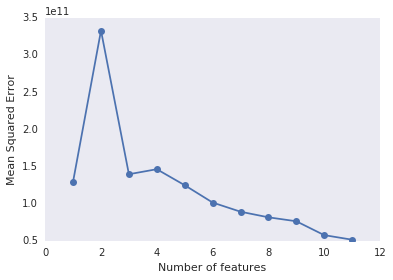

In [239]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, median_absolute_error, mean_squared_error

# clase para hacer Backward Selection
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# aplicamos algoritmos
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
sbs = SBS(knn, k_features=1, scoring=mean_squared_error)
sbs.fit(X_train_std, y_train)

# graficamos
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
#ylim([0.0, 1.1])
ylabel('Mean Squared Error')
xlabel('Number of features')
grid()
show()

Observamos que el RMSE disminuye a medida que aumentamos la cantidad de features. No parece necesario disminuir la cantidad de features a menos que sea por temas de performance.

In [250]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# busqueda de hiper-parametros
k_scores = []
k_list = []

best_score = float("inf")

print('Buscando k optimo .',end='')
for i in [10,20,30,40,60,70,80,90,100]:
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    k_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_k = i
        print("")
        print("score=",best_score,"k=",best_k)
        
print("El k optimo parece estar cerca de",best_k)

Buscando k optimo ..
score= 182234.61302755043 k= 10
........El k optimo parece estar cerca de 10


In [251]:
# buscamos alrededor del 10
print('Buscando k optimo .',end='')
for i in [1,2,3,4,5,6,7,8,9]:
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    k_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_k = i
        print("")
        print("score=",best_score,"k=",best_k)
        
print("El k optimo parece estar cerca de",best_k)

Buscando k optimo .....
score= 181332.90028056016 k= 4
.
score= 180403.8344437276 k= 5
....El k optimo parece estar cerca de 5


In [254]:
p_list = []
print('Buscando p optimo .',end='')
for p in [100,81,77,66,50,43,30,25,14,9,2]:
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=best_k, p=p, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    p_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_p = p
        print("")
        print("score=",best_score,"k=",best_p)
        
print("El p optimo parece estar cerca de",best_p)

Buscando p optimo ............El p optimo parece estar cerca de 2


In [255]:
# entrenamos el modelo
model_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p, n_jobs=-1)
model_knn.fit(X_train_std, y_train)

y_predict = model_knn.predict(X_train_std)
print("Error del set de entrenamiento",sqrt(mean_squared_error(y_predict,y_train)))

y_predict = model_knn.predict(X_test_std)
print("Error del set de test",sqrt(mean_squared_error(y_predict,y_test)))


Error del set de entrenamiento 22749.66179288189
Error del set de test 180403.8344437276


## Algoritmo II: Random Forest

### RF con datos no-normalizados

In [38]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: -33541212554.38330, std: 16248307702.43759, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5},
  mean: -33488184306.26409, std: 16301187654.12930, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: -35035329484.53563, std: 16401177089.94158, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 5},
  mean: -37422541072.42477, std: 16244407394.48372, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10},
  mean: -37474200433.41467, std: 16588006068.28053, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: -37569916315.01438, std: 16410243779.76884, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 10},
  mean: -41397958145.92339, std: 16871433160.83206, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 15},
  mean: -41599834030.63509, std: 16619895273.71703, params: {'max_depth': 10, 'min_samples_split': 10, 'min_sa

In [39]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: -30179159717.86546, std: 15616066575.31117, params: {'n_estimators': 100},
  mean: -29980101261.24088, std: 15495720281.26892, params: {'n_estimators': 200},
  mean: -30101242564.30783, std: 15599592591.96099, params: {'n_estimators': 300},
  mean: -30017596032.08439, std: 15594394780.47940, params: {'n_estimators': 400},
  mean: -30032730656.95195, std: 15675222025.98391, params: {'n_estimators': 500},
  mean: -30018576786.31141, std: 15618697538.08820, params: {'n_estimators': 600},
  mean: -30020408361.69139, std: 15478325037.28069, params: {'n_estimators': 700},
  mean: -29984418077.06814, std: 15544471719.82263, params: {'n_estimators': 800},
  mean: -30016970160.54661, std: 15503366306.93305, params: {'n_estimators': 900},
  mean: -30055881702.86349, std: 15558616882.76456, params: {'n_estimators': 1000}],
 {'n_estimators': 200},
 -29980101261.240883)

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test),y_test)))

RMSE:  195508.5831504827


In [12]:
# entrenamos el modelo
from sklearn.ensemble import RandomForestRegressor

model_rf1 = RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
model_rf1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(model_rf1.predict(X_test),y_test)))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE:  426350.1657869641


### RF con datos normalizados

In [ ]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: -33560509009.45726, std: 16139331957.76023, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5},
  mean: -33487612627.29683, std: 16363183890.34245, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: -34828791518.83158, std: 16399934876.30589, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 5},
  mean: -37875762403.64905, std: 16453476623.49070, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10},
  mean: -37511667781.86235, std: 16433721353.32144, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: -37553579869.80670, std: 16387275532.88199, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 10},
  mean: -41533355975.70618, std: 16689520123.97775, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 15},
  mean: -41446288046.26664, std: 16732545965.57790, params: {'max_depth': 10, 'min_samples_split': 10, 'min_sa

In [ ]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test_std),y_test)))

In [ ]:
# entrenamos el modelo
from sklearn.ensemble import RandomForestRegressor

model_rf2 = RandomForestRegressor(n_estimators=500, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
model_rf2.fit(X_train_std, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(model_rf2.predict(X_test_std),y_test)))

## ENSAMBLE

### Levantar set de test

In [377]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...


In [431]:
# nos quedamos con las columnas con las que entrenamos el modelo
test_predcit_df = test_df.loc[:,columns]
test_predcit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 11 columns):
created_on               14166 non-null int64
property_type            14166 non-null int64
place_name               14166 non-null int64
state_name               14166 non-null int64
lat                      14166 non-null float64
lon                      14166 non-null float64
surface_total_in_m2      14166 non-null float64
surface_covered_in_m2    14166 non-null float64
floor                    14166 non-null float64
rooms                    14166 non-null float64
expenses                 14166 non-null float64
dtypes: float64(7), int64(4)
memory usage: 1.2 MB


In [432]:
# completamos los nulos
test_predcit_df['floor'] = test_predcit_df[['floor']].fillna(0)
test_predcit_df['rooms'] = test_predcit_df[['rooms']].fillna(0)

test_predcit_df[['floor','rooms']].describe()

,floor,rooms
count,14166.000000,14166.000000
mean,1.031272,1.484893
std,29.206664,1.742398
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,2509.000000,21.000000


In [433]:
test_predcit_df['expenses'] = test_predcit_df['expenses'].fillna(0)
test_predcit_df[~test_predcit_df['expenses'].astype(str).str.isdigit()]['expenses']

0           0.0
1           0.0
2        1500.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8        2600.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
          ...  
14136       0.0
14137       0.0
14138       0.0
14139       0.0
14140       0.0
14141       0.0
14142       0.0
14143       0.0
14144       0.0
14145       0.0
14146       0.0
14147       0.0
14148       0.0
14149       0.0
14150       0.0
14151       0.0
14152       0.0
14153       0.0
14154       0.0
14155       0.0
14156       0.0
14157     200.0
14158       0.0
14159    3340.0
14160    3340.0
14161    8500.0
14162       0.0
14163       0.0
14164    4128.0
14165       0.0
Name: expenses, dtype: f

In [381]:
import re

re.sub('(\$+)','', "12000")

'12000'

In [434]:
def to_numeric(x):
    replacement = x
    try:
        replacement = re.sub('(\$+)','', replacement)
        replacement = re.sub('aprox','', replacement)
        replacement = re.sub('Sin expensas','', replacement)
        replacement = re.sub('NO','0', replacement)
        replacement = re.sub('SI','0', replacement)
        replacement = re.sub('(\.+)','', replacement)
        replacement = re.sub(' ','', replacement)
        replacement = re.sub('\/.*$','', replacement)
        replacement = re.sub('\+.*$','', replacement)
    except:
        return x
    return replacement
    
test_predcit_df['expenses'] = test_predcit_df['expenses'].apply(to_numeric)
test_predcit_df[~test_df['expenses'].astype(str).str.isdigit()]['expenses']

0           0.0
1           0.0
2        1500.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8        2600.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
          ...  
14136       0.0
14137       0.0
14138       0.0
14139       0.0
14140       0.0
14141       0.0
14142       0.0
14143       0.0
14144       0.0
14145       0.0
14146       0.0
14147       0.0
14148       0.0
14149       0.0
14150       0.0
14151       0.0
14152       0.0
14153       0.0
14154       0.0
14155       0.0
14156       0.0
14157     200.0
14158       0.0
14159    3340.0
14160    3340.0
14161    8500.0
14162       0.0
14163       0.0
14164    4128.0
14165       0.0
Name: expenses, dtype: f

In [435]:
test_predcit_df['expenses'] = pd.to_numeric(test_predcit_df['expenses'])
test_predcit_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,20170824,1,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,20170825,1,29,4,-34.629923,-58.465820,0.0,0.0,0.0,0.0,0.0
2,20170801,1,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,20170801,1,40,3,-34.629923,-58.465820,39.0,39.0,0.0,0.0,0.0
4,20170801,1,40,3,-34.629923,-58.465820,51.0,51.0,0.0,0.0,0.0


In [420]:
test_predcit_df['expenses'] = test_predcit_df['expenses'].fillna(0)

In [436]:
test_predcit_df['state_name'].value_counts()

3    8847
1    3101
2    2215
0       2
4       1
Name: state_name, dtype: int64

In [437]:
def convert_state_name(x):
    name = str(x)
    if('Capital Federal' in x):
        return 3
    if('Zona Norte' in x):
        return 0
    if('Zona Sur' in x):
        return 2
    if('Zona Oeste' in x):
        return 1
    return 4

test_predcit_df['state_name'] = test_predcit_df.state_name.apply(convert_state_name)
test_predcit_df['state_name'].value_counts()

TypeError: argument of type 'int' is not iterable

In [398]:
c['place_name'].value_counts()

Palermo                       1020
Belgrano                       783
Caballito                      650
La Plata                       603
Recoleta                       556
Ituzaingó                      547
Ramos Mejía                    394
Morón                          393
Almagro                        376
Castelar                       345
Villa Crespo                   329
Flores                         329
Balvanera                      327
Villa Urquiza                  309
Nuñez                          300
Barrio Norte                   276
Capital Federal                247
Monserrat                      221
Saavedra                       211
San Telmo                      207
Lomas de Zamora                197
Quilmes                        178
Moreno                         171
Palermo Hollywood              164
Puerto Madero                  155
Banfield                       134
Haedo                          126
Villa Devoto                   123
Lanús               

In [438]:
test_predcit_df['place_name'] = encoder_place_name.fit_transform(test_predcit_df['place_name'])
test_predcit_df['place_name'].value_counts()

133    1020
20      783
31      650
96      603
157     556
92      547
155     394
129     393
7       376
37      345
196     329
73      329
12      327
218     309
130     300
17      276
34      247
124     221
160     211
168     207
110     197
153     178
128     171
135     164
152     155
13      134
85      126
197     123
101     113
47      113
       ... 
175       1
70        1
56        1
126       1
150       1
55        1
15        1
80        1
222       1
26        1
9         1
77        1
99        1
2         1
50        1
114       1
154       1
162       1
194       1
105       1
65        1
29        1
207       1
116       1
164       1
18        1
172       1
212       1
5         1
0         1
Name: place_name, dtype: int64

In [401]:
test_df['surface_total_in_m2'] = test_df[['surface_total_in_m2']].fillna(0)
test_df['surface_covered_in_m2'] = test_df[['surface_covered_in_m2']].fillna(0)
test_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,2017-08-24,departamento,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,2017-08-25,departamento,29,4,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,2017-08-01,departamento,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,2017-08-01,departamento,40,3,NaN,NaN,39.0,39.0,0.0,0.0,0.0
4,2017-08-01,departamento,40,3,NaN,NaN,51.0,51.0,0.0,0.0,0.0


In [403]:
test_df['property_type'].value_counts()

departamento    9761
casa            3409
ph               996
Name: property_type, dtype: int64

In [407]:
def convert_property_type(x):
    if('departamento' in x):
        return 1
    if('casa' in x):
        return 2
    if('ph' in x):
        return 0
    return 3

test_df['property_type'] = test_df.property_type.apply(convert_property_type)
test_df['property_type'].value_counts()

1    9761
2    3409
0     996
Name: property_type, dtype: int64

In [408]:
test_df['created_on'] = test_df['created_on'].str.replace('-','').apply(int)
test_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,20170824,1,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,20170825,1,29,4,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,20170801,1,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,20170801,1,40,3,NaN,NaN,39.0,39.0,0.0,0.0,0.0
4,20170801,1,40,3,NaN,NaN,51.0,51.0,0.0,0.0,0.0


Claramente hay que mejorar el tema de los lat y lon nulos. Por ahora solo asigno un promedio

In [410]:
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)

test_df["lat"] = imputer_mean.fit_transform(test_df[["lat"]])
test_df["lon"] = imputer_mean.fit_transform(test_df[["lon"]])

test_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,20170824,1,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,20170825,1,29,4,-34.629923,-58.465820,0.0,0.0,0.0,0.0,0.0
2,20170801,1,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,20170801,1,40,3,-34.629923,-58.465820,39.0,39.0,0.0,0.0,0.0
4,20170801,1,40,3,-34.629923,-58.465820,51.0,51.0,0.0,0.0,0.0


In [422]:
stdsc_prediction = StandardScaler()
X_test_std_df = stdsc_prediction.fit_transform(test_df)
X_test_std_df

array([[  1.24258347e+00,  -3.20797510e-01,   7.82855685e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [  1.36710992e+00,  -3.20797510e-01,  -1.17649092e+00, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [ -1.62152505e+00,  -3.20797510e-01,   5.27981330e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -3.19255009e-04],
       ..., 
       [ -1.62152505e+00,   1.56250855e+00,   1.13810503e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [  1.36710992e+00,  -3.20797510e-01,  -1.31985774e+00, ...,
         -3.53107240e-02,  -8.52242370e-01,   3.21611770e-02],
       [ -2.51734022e-01,   1.56250855e+00,  -9.69405505e-01, ...,
         -3.53107240e-02,   1.44352476e+00,  -1.88583144e-02]])

### Predecir y ensamblar

In [423]:
y_knn = model_knn.predict(X_test_std_df)
#y_rf1 = model_rf1.predict(X_test_df)
#y_rf2 = model_rf2.predict(X_test_std_df)

In [424]:
print(y_knn)
#print(y_rf1)

[[ 995729.7845753 ]
 [ 289414.99780888]
 [ 343306.08330696]
 ..., 
 [ 115175.00707279]
 [ 282901.42645604]
 [ 157935.48012229]]


Tener en cuenta para el ensamble cuales fueron los RMSE de cada algoritmo asi le damos un peso acorde a los errores de cada modelo

In [62]:
# ensamble
C1 = 0.2
C2 = 0.4
C3 = 0.4

y_final = []
for row1,row2,row3 in zip(y_knn,y_rf1,y_rf2):
    y_final.append(C1 * float(row1) + C2 * float(row2) + C3 * float(row3))

In [47]:
# ensamble
C1 = 1
C2 = 0

y_final = []
for row1,row2 in zip(y_knn,y_rf1):
    y_final.append((C1 * float(row1) + C2 * float(row2)) )

In [428]:
# ensamble
C1 = 1
C2 = 0

y_final = []
for row1 in y_knn:
    y_final.append(float(row1))

[ 995729.7845753]
[ 289414.99780888]
[ 343306.08330696]
[ 288070.14037135]
[ 288067.42040313]
[ 288070.14037135]
[ 288070.14037135]
[ 288070.14037135]
[ 267485.11116206]
[ 285415.76313047]
[ 285415.76313047]
[ 285415.76313047]
[ 259637.46747803]
[ 305180.74900087]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185470.58695244]
[ 185473.39994978]
[ 185473.39994978]
[ 185473.39994978]
[ 185473.39994978]
[ 185439.54794441]
[ 185439.54794441]
[ 208210.56867933]
[ 208210.56867933]
[ 208210.56867933]
[ 208210.56867933]
[ 208210.56867933]
[ 185439.54794441]
[ 208210.56867933]
[ 208210.56867933]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 185439.54794441]
[ 289380.32579043]
[ 285426.94957279]
[ 259637.46747803]
[ 259637.46747803]
[ 298101.16825681]
[ 285422.59321068]
[ 171904.1218998]
[ 132477.91140764]
[ 263738.25717654]
[ 289351.52690897]
[ 263817.03756323]
[ 282424.25189

In [429]:
print(y_final)

[995729.784575305, 289414.99780888495, 343306.08330695814, 288070.1403713511, 288067.42040313134, 288070.1403713511, 288070.1403713511, 288070.1403713511, 267485.11116206273, 285415.76313047495, 285415.76313047495, 285415.76313047495, 259637.46747802504, 305180.7490008712, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185470.58695243628, 185473.3999497847, 185473.3999497847, 185473.3999497847, 185473.3999497847, 185439.54794441207, 185439.54794441207, 208210.56867932648, 208210.56867932648, 208210.56867932648, 208210.56867932648, 208210.56867932648, 185439.54794441207, 208210.56867932648, 208210.56867932648, 185439.54794441207, 185439.54794441207, 185439.54794441207, 185439.54794441207, 289380.32579043054, 285426.9495727859, 259637.46747802504, 259637.46747802504, 298101.16825680615, 285422.5932106776, 171904.12189980265, 132477.91140763994, 263738.25717653806, 289351.52690

In [430]:
# escribir al archivo
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":y_final} )
output.to_csv( "../data/result/ensamblev02_knn_"+str(now)+".csv", index=False, quoting=3 )

KeyError: 'id'